### Use Wholesale Customers dataset and perform the following:
1. Implement Pre-processing functions
    - Check for NULL values in the dataset. If any NULL value is present then treat it accordingly.
    - extract only feature columns from the dataset.
2. Determine the number of clusters using dendogram. Use ward linkage method.
3. Apply agglomerative clustering using ward linkage method.
4. Form the clusters.
5. Visualize the clusters formed by agglomerative clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\\Dataset\\Wholesale_customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### From above results no NULL value observed in dataset.

In [5]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(data)

In [6]:
from scipy.cluster.hierarchy import linkage

lnk = linkage(X_scaled, method='ward')

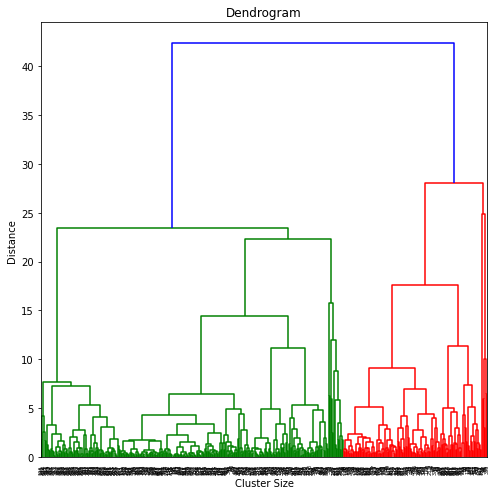

In [7]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(8,8))
dendrogram(lnk,  orientation='top')
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [8]:
# Helper function for plotting

def plot_3d_graph(X_scaled, cluster_labels):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_scaled[:, 2], X_scaled[:, 3], X_scaled[:, 4], s=50, alpha=0.5, c=cluster_labels, cmap='rainbow')
    ax.set_xlabel('Fresh')
    ax.set_ylabel('Milk')
    ax.set_zlabel('Grocery')

    plt.show()

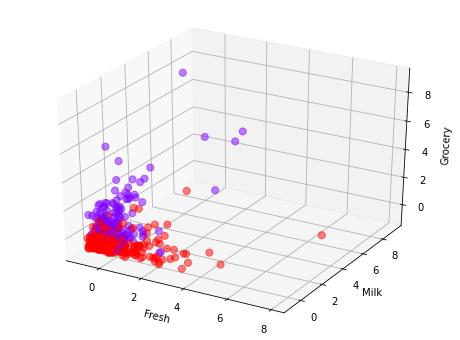

In [9]:
from sklearn.cluster import AgglomerativeClustering

# n_clusters=2
agc = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = agc.fit_predict(X_scaled)

plot_3d_graph(X_scaled, cluster_labels)

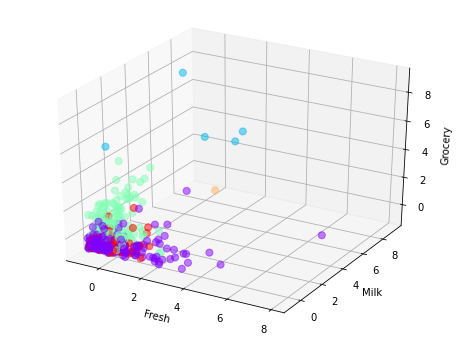

In [10]:
from sklearn.cluster import AgglomerativeClustering

# n_clusters=5
agc = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = agc.fit_predict(X_scaled)

plot_3d_graph(X_scaled, cluster_labels)

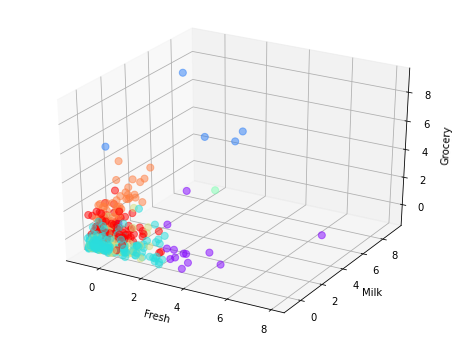

In [11]:
from sklearn.cluster import AgglomerativeClustering

#n_clusters=7
agc = AgglomerativeClustering(n_clusters=7, linkage='ward')
cluster_labels = agc.fit_predict(X_scaled)

plot_3d_graph(X_scaled, cluster_labels)

### Evaluating cluster quality using Silhouette

In [12]:
from sklearn.metrics import silhouette_score 

k = range(2,10)
sil_scr = []

for x in k:
    ac = AgglomerativeClustering(n_clusters = x,  affinity='euclidean', linkage='ward') 
    sil_scr.append(silhouette_score(X_scaled, ac.fit_predict(X_scaled)))

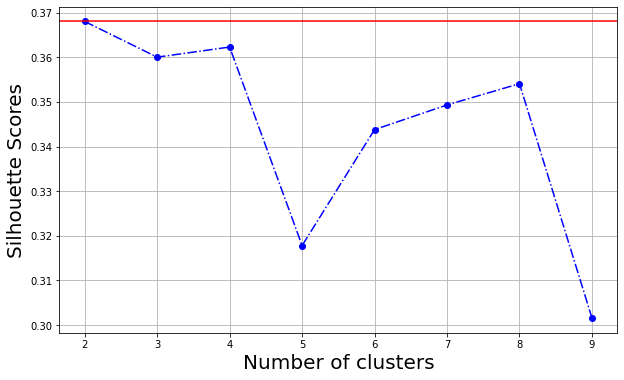

In [13]:
plt.figure(figsize=(10,6))
plt.plot(k, sil_scr, 'bo-.')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Scores', fontsize = 20)
plt.axhline(np.max(sil_scr), color="red")
plt.grid()
plt.show()

In [14]:
print("Max Silhouette score of '{0}' at clusters = {1}".format(np.max(sil_scr), k[np.argmax(sil_scr)]))

Max Silhouette score of '0.3680209405194812' at clusters = 2
